In [1]:
import os
import pandas as pd
import numpy as np
import scipy.io
from matplotlib import pyplot as plt

In [2]:
data_dir = '/Users/tyler/Datasets/deepsat-sat6/'

In [3]:
os.listdir(data_dir)

['y_test_sat6.csv',
 'sat-6-full.mat',
 'X_train_sat6.csv',
 'sat6annotations.csv',
 'y_train_sat6.csv',
 'X_test_sat6.csv']

In [4]:
dataset = scipy.io.loadmat(data_dir+'sat-6-full.mat')

In [5]:
dataset['train_x'][0][0]

array([[116, 177,  20, ...,  74, 117, 203],
       [119, 152,  34, ..., 100, 124, 191],
       [118, 129,  72, ...,  92,  99, 153],
       [159, 183,  10, ...,  11, 187, 188]], dtype=uint8)

In [6]:
dataset['train_y'].shape

(6, 324000)

In [7]:
train = pd.read_csv(data_dir+'X_test_sat6.csv')

In [8]:
train.head()

,95,91,61,157,105,113,101,179,50,35,...,107.39,181.10,118.21,137.14,127.17,205,90.30,105.58,86.25,183.12
0,102,102,103,137,108,110,116,154,88,83,...,91,157,95,92,84,143,89,85,76,130
1,47,54,95,10,79,89,108,15,96,131,...,118,17,82,98,125,18,61,69,113,13
2,200,181,178,218,192,177,176,214,162,141,...,139,203,157,138,125,193,147,128,107,187
3,85,101,100,15,87,102,97,16,54,71,...,74,8,37,49,76,6,27,43,69,6
4,49,54,71,69,53,63,72,80,41,43,...,105,169,57,58,49,116,49,54,36,118


In [9]:
labels = pd.read_csv(data_dir+'y_train_sat6.csv')

In [10]:
labels.head()

,0,0.1,1,0.2,0.3,0.4
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,1,0,0,0,0,0


In [11]:
def row_to_img(row_values):
    return row_values.reshape(-1, 28, 28, 4).clip(0, 255).astype(np.uint8).squeeze(axis=0)[:,:,:3]

In [12]:
def get_labels(row_values):
    annotations = ['building', 'barren_land','trees', 'grassland', 'road', 'water']
    labels = [annotations[i] for x, i in enumerate(row_values) if x == 1]
    return labels[0]

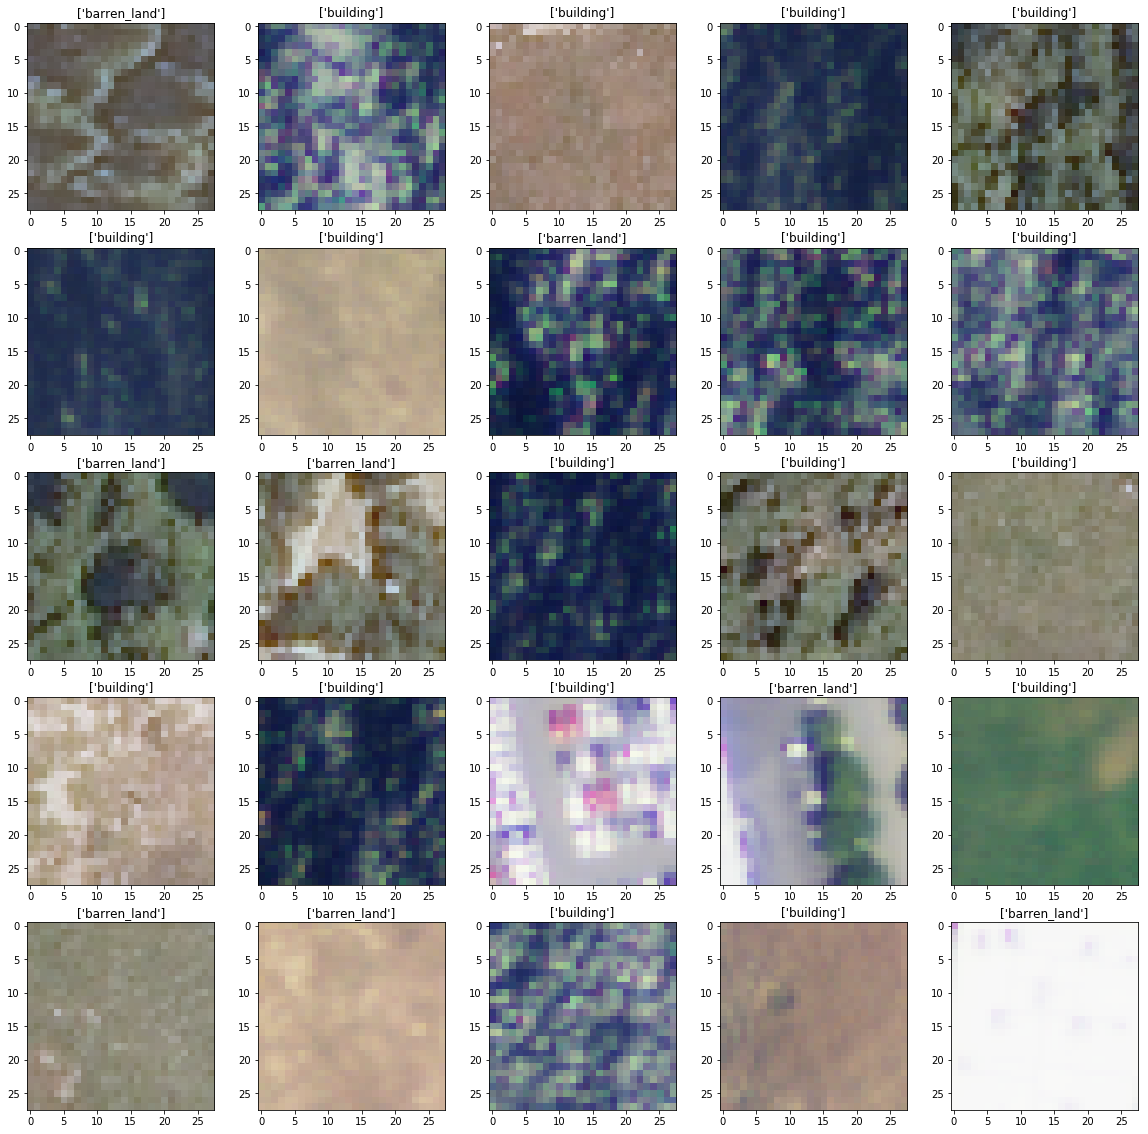

In [13]:
fig, axs = plt.subplots(5, 5, figsize = (20, 20))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(get_labels(labels.iloc[i].values))
    ax.imshow(row_to_img(train.iloc[i].values))

In [15]:
for index, row in labels.iterrows():
    if sum(row.values) > 1:
        print(index)

In [16]:
len(labels)

323999